/tmp/ipykernel_2284/167239021.py:15: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, names=['rk', 'cond', 'a1', 'a2', 'a3', 'a4', 'a6', 'sign'])
/tmp/ipykernel_2284/167239021.py:15: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, names=['rk', 'cond', 'a1', 'a2', 'a3', 'a4', 'a6', 'sign'])


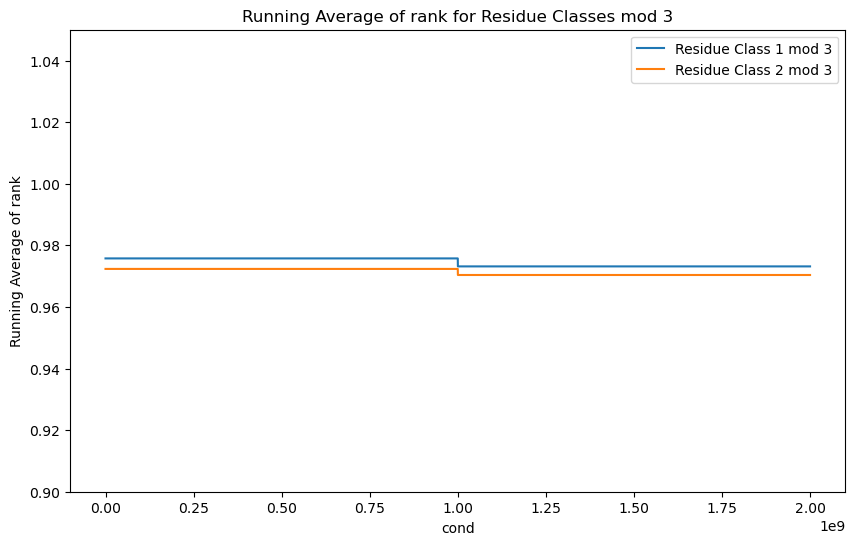

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Assuming your DataFrame is named df
prime_moduli = [3]

# Initialize defaultdict for storing partial results and counts
results = defaultdict(lambda: defaultdict(lambda: {"total": 0, "count": 0, "conds": [], "avgs": []}))

# Process each file one at a time
for i in range(2):
    filename = f'~/results/trueranks/ranks_'+str(i).zfill(5)+'.csv'
    df = pd.read_csv(filename, names=['rk', 'cond', 'a1', 'a2', 'a3', 'a4', 'a6', 'sign'])

    # Loop over the prime moduli
    for p in prime_moduli:
        for residue_class in range(1, p):
            # Filter DataFrame for the given residue class mod p
            filtered_df = df[df['cond'] % p == residue_class]

            # Calculate running average for the current residue class mod p
            total_rk = filtered_df['rk'].sum()
            count = len(filtered_df)
            prev_total_rk = results[p][residue_class]['total']
            prev_count = results[p][residue_class]['count']
            running_avg = (prev_total_rk + total_rk) / (prev_count + count)

            # Update the results
            results[p][residue_class]['total'] += total_rk
            results[p][residue_class]['count'] += count
            results[p][residue_class]['conds'].extend(filtered_df['cond'].values)
            results[p][residue_class]['avgs'].extend([running_avg] * count)

# Plot the accumulated running averages
for p in prime_moduli:
    plt.figure(figsize=(10, 6))
    for residue_class in range(1, p):
        # Plot running average vs 'cond' values
        plt.plot(results[p][residue_class]['conds'], results[p][residue_class]['avgs'],
                 label=f'Residue Class {residue_class} mod {p}')

    plt.xlabel('cond')
    plt.ylabel('Running Average of rank')
    plt.title(f'Running Average of rank for Residue Classes mod {p}')
    plt.ylim(0.90, 1.05)
    plt.legend()
    plt.show()


In [2]:
import pandas as pd
df = pd.read_csv('/home/eva/results/trueranks/ranks_00000.csv',names=['rk', 'cond', 'a1', 'a2', 'a3', 'a4', 'a6', 'sign'])

/tmp/ipykernel_2284/3507778120.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/eva/results/trueranks/ranks_00000.csv',names=['rk', 'cond', 'a1', 'a2', 'a3', 'a4', 'a6', 'sign'])


array([(0, -1, 1), (1, -1, 1), (0, 1, 1), (0, 0, 1), (1, 0, 0),
       (1, -1, 0), (1, 1, 1), (1, 1, 0), (1, 0, 1)], dtype=object)